# Upsampling sentinel image, cropping to same area as NAIP

(6000, 6000, 3)
(600, 600, 3)


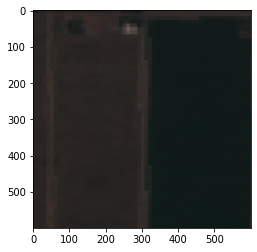

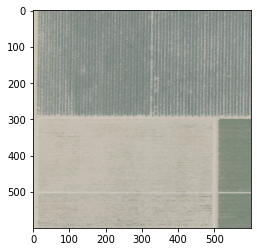

In [10]:
from osgeo import gdal
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import scipy
import numpy as np
from scipy import ndimage
import tifffile as tiff

#1. Get images
sentinel = gdal.Open('Sentinel_31_05_1.tif').ReadAsArray()
sentinel = tiff.imread('Sentinel_31_05_1.tif')
sentinel_reshaped = sentinel.reshape(669,669,3)
naip = Image.open('NAIPFresno.tif') 
naip_array = np.array(naip) 
#2. Crop to multiple images (length 200m): 
sentinel_crop = sentinel_reshaped[0:600, 0:600, :]
naip_crop = naip_array[0:600, 0:600, :]
#3. Resize (upscaling by factor 10)
sentinel_resized = scipy.ndimage.zoom(sentinel_crop,(10,10,1), order=0)
print(sentinel_resized.shape)
#4. Crop: 
sentinel_crop2 = sentinel_resized[700:1300, 700:1300, :]
print(sentinel_crop2.shape)
#sentinel_crop2_unit8 = normalize(sentinel_crop2)
#plt.figure()
#plt.imshow(sentinel_crop2,vmin=0.0, vmax=0.3)
tiff.imsave('sentinel_crop2.png', sentinel_crop2)
plt.figure()
plt.imshow(sentinel_crop2)
plt.figure()
plt.imshow(naip_crop)

## Other Trials

(6680, 6680, 4)


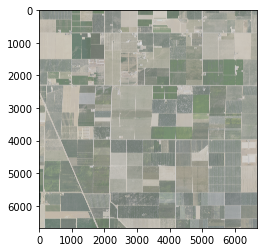

In [60]:
from PIL import Image
import numpy 
import matplotlib.pyplot as plt

im = Image.open('NAIPFresno.tif') 
imarray = numpy.array(im) 
print(imarray.shape)
plt.imshow(im)

In [61]:
imarray.shape

(6680, 6680, 4)

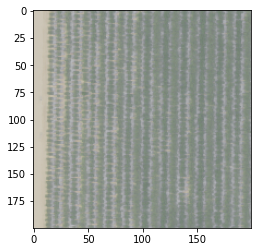

In [62]:
crop = imarray[0:200, 0:200, :]
plt.imshow(crop)

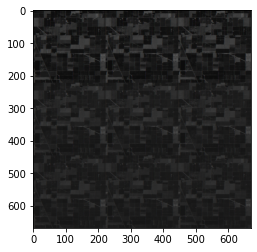

In [73]:
sentinel = gdal.Open('Sentinel_31_05_1.tif').ReadAsArray()
sentinel_reshaped = sentinel.reshape(669,669,3)
plt.imshow(sentinel_reshaped)

In [84]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
ds = gdal.Open('Sentinel_31_05_1.tif').ReadAsArray()
print(type(ds))
x = ds
dsx = np.moveaxis(x, 0, -1).shape
print(type(dsx))

<class 'numpy.ndarray'>
<class 'tuple'>


In [86]:
ds = gdal.Open('Sentinel_31_05_1.tif').ReadAsArray()
dsx = np.rollaxis(ds, -1, 2).shape

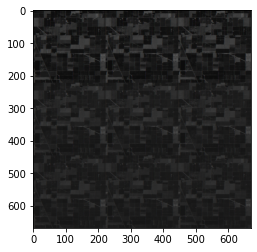

In [69]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
sentinel = gdal.Open('Sentinel_31_05_1.tif').ReadAsArray()
sentinel_reshaped = sentinel.reshape(669,669,3)
im = plt.imshow(sentinel_reshaped)

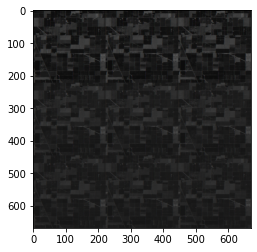

In [20]:
crop = sentinel_reshaped[0:669, 0:669, :]
plt.imshow(crop)

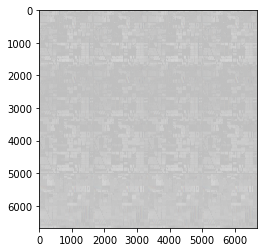

In [126]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
ds = gdal.Open('NAIPFresno.tif').ReadAsArray()
ds_ = ds.reshape(6680,6680,4)
im = plt.imshow(ds_)

In [ ]:
def normalize8(I):
  mn = I.min()
  mx = I.max()

  mx -= mn

  I = ((I - mn)/mx) * 255
  return I.astype(np.uint8)
sentinel_crop2_unit8 = normalize8(sentinel_crop2)

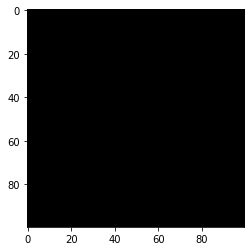

In [53]:
sentinel_crop2.dtype
img_uint8 = sentinel_crop2.astype(np.uint8)
plt.imshow(img_uint8)

In [54]:
sentinel_crop2

array([[[0.0638, 0.1115, 0.1523],
        [0.0638, 0.1115, 0.1523],
        [0.0638, 0.1115, 0.1523],
        ...,
        [0.1185, 0.1182, 0.1188],
        [0.1185, 0.1182, 0.1188],
        [0.1185, 0.1182, 0.1188]],

       [[0.0638, 0.1115, 0.1523],
        [0.0638, 0.1115, 0.1523],
        [0.0638, 0.1115, 0.1523],
        ...,
        [0.1185, 0.1182, 0.1188],
        [0.1185, 0.1182, 0.1188],
        [0.1185, 0.1182, 0.1188]],

       [[0.0638, 0.1115, 0.1523],
        [0.0638, 0.1115, 0.1523],
        [0.0638, 0.1115, 0.1523],
        ...,
        [0.1185, 0.1182, 0.1188],
        [0.1185, 0.1182, 0.1188],
        [0.1185, 0.1182, 0.1188]],

       ...,

       [[0.0652, 0.1026, 0.1455],
        [0.0652, 0.1026, 0.1455],
        [0.0652, 0.1026, 0.1455],
        ...,
        [0.1184, 0.1184, 0.1242],
        [0.1184, 0.1184, 0.1242],
        [0.1184, 0.1184, 0.1242]],

       [[0.0652, 0.1026, 0.1455],
        [0.0652, 0.1026, 0.1455],
        [0.0652, 0.1026, 0.1455],
        .

In [16]:
import scipy
from scipy import ndimage
print(sentinel_reshaped.shape)
#sentinel_resized = sentinel_reshaped.resize(newsize)
sentinel_resized = scipy.ndimage.zoom(sentinel_reshaped, (10,10,1), order=0)
sentinel_resized.shape

(669, 669, 3)


(6690, 6690, 3)

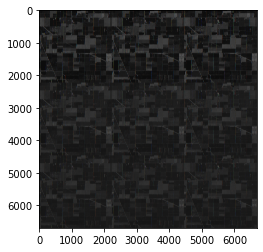

In [17]:
im = plt.imshow(sentinel_resized)

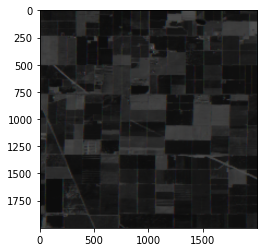

In [18]:
crop = sentinel_resized[0:2000, 0:2000, :]
plt.imshow(crop)

In [88]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
from numpy import moveaxis
sen = gdal.Open('Sentinel_31_05_1.tif').ReadAsArray()
# change channels first to channels last format
data = moveaxis(sen, 0, 2)
print(data.shape)

(669, 669, 3)


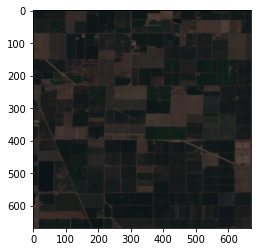

In [89]:
plt.imshow(data)

In [101]:
data[:,:,0]

array([[0.1658, 0.1658, 0.1336, ..., 0.0659, 0.0634, 0.0638],
       [0.1649, 0.1649, 0.1428, ..., 0.0622, 0.061 , 0.0634],
       [0.1679, 0.1679, 0.1366, ..., 0.0626, 0.0615, 0.0635],
       ...,
       [0.2077, 0.2067, 0.2144, ..., 0.1317, 0.1486, 0.176 ],
       [0.205 , 0.2071, 0.2071, ..., 0.1357, 0.1436, 0.1909],
       [0.2043, 0.2081, 0.2081, ..., 0.1381, 0.1427, 0.1955]],
      dtype=float32)

In [93]:
data/0.3*255

array([[[140.93    , 135.15    , 123.759995],
        [140.93    , 135.15    , 123.759995],
        [113.55999 , 112.11499 , 102.59499 ],
        ...,
        [ 56.014996,  78.71    ,  83.130005],
        [ 53.889996,  78.11499 ,  80.579994],
        [ 54.23    ,  78.965   ,  82.704994]],

       [[140.165   , 142.79999 , 123.33499 ],
        [140.165   , 142.79999 , 123.33499 ],
        [121.38    , 104.295   , 107.77999 ],
        ...,
        [ 52.87    ,  78.455   ,  80.92    ],
        [ 51.85    ,  77.774994,  81.939995],
        [ 53.889996,  77.435   ,  82.19499 ]],

       [[142.715   , 122.65499 , 115.43    ],
        [142.715   , 122.65499 , 115.43    ],
        [116.11    , 106.079994, 109.565   ],
        ...,
        [ 53.21    ,  78.455   ,  81.77    ],
        [ 52.274998,  78.54    ,  82.365   ],
        [ 53.975   ,  78.11499 ,  81.09    ]],

       ...,

       [[176.54498 , 149.855   , 143.99    ],
        [175.69499 , 150.365   , 144.24498 ],
        [182.23999 , 1

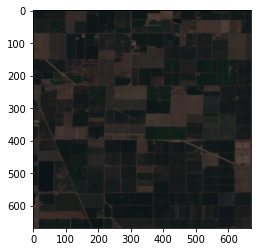

In [96]:

plt.imshow(data)

In [116]:
from PIL import Image
img = Image.fromarray(data, 'RGB')
#img.save('my.png')
img.show()

In [117]:
import tifffile as tiff
a = tiff.imread('Sentinel_31_05_1.tif')
tiff.imsave('new.png', a)
a.shape
a.dtype

dtype('float32')

In [120]:
a.shape

(669, 669, 3)

In [39]:
sentinel = tiff.imread('Sentinel_31_05_1.tif')
tiff.imsave('1.png', sentinel )

In [28]:
sentinel_reshaped = sentinel.reshape(669,669,3)
tiff.imsave('1_5.png', sentinel_reshaped )

In [29]:
sentinel_crop = sentinel_reshaped[0:600, 0:600, :]
tiff.imsave('2.png',sentinel_crop)

In [30]:
sentinel_resized = scipy.ndimage.zoom(sentinel_crop,(10,10,1), order=0)
tiff.imsave('3.png',sentinel_resized )

In [31]:
sentinel_crop2 = sentinel_resized[700:1300, 700:1300, :]
tiff.imsave('4.png',sentinel_crop2 )

In [40]:
naip = tiff.imread('NAIPFresno.tif')
tiff.imsave('1Naip.png', naip )

In [41]:
sentinel.shape

(669, 669, 3)

In [42]:
naip.shape

(6680, 6680, 4)

In [43]:
naip_crop = naip[0:600, 0:600, :]
tiff.imsave('2Naip.png', naip_crop )

In [44]:
sentinel_crop = sentinel_reshaped[0:60, 0:60, :]
tiff.imsave('2_60.png',sentinel_crop)

In [45]:
sentinel_resized = scipy.ndimage.zoom(sentinel_crop,(10,10,1), order=0)
tiff.imsave('3_60.png',sentinel_resized )